In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data=pd.read_csv("insurance.csv")


### 1. Display Top 5 Rows of The Dataset

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Check Last 5 Rows of The Dataset

In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(1338, 7)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5.Check Null Values In The Dataset

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [10]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Age Distributon

C:\Users\Sai Siva Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


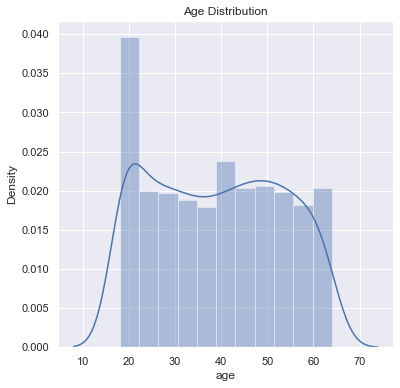

In [11]:

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

Gender column

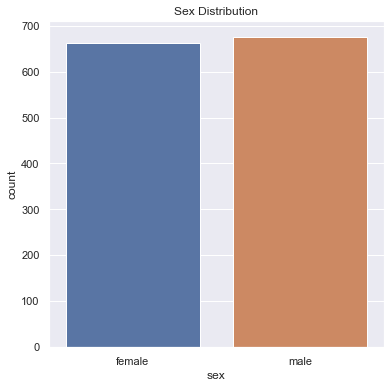

In [12]:

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
mean_price_sex = data[['sex', 'charges']].groupby('sex', as_index = False).mean()
mean_price_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


BMI distribution

C:\Users\Sai Siva Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


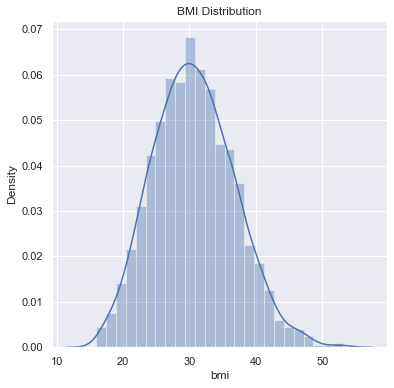

In [15]:

plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

Children column

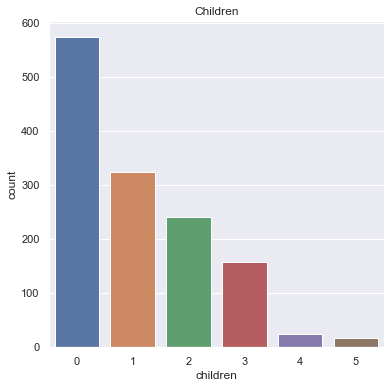

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [17]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

 smoker column

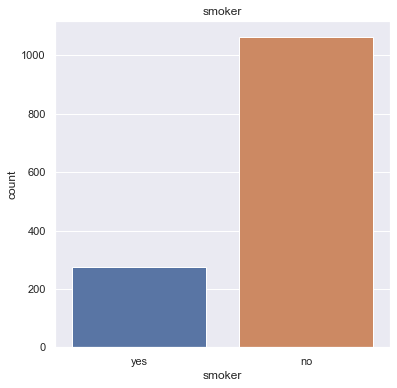

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

In [19]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
### Mean price for smoker 

mean_price_smoker = data[['smoker', 'charges']].groupby('smoker', as_index = False).mean()
mean_price_smoker

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


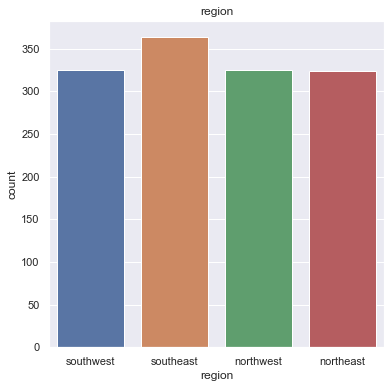

In [21]:
# region column
plt.figure(figsize=(6,6))

sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

In [22]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Sai Siva Teja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


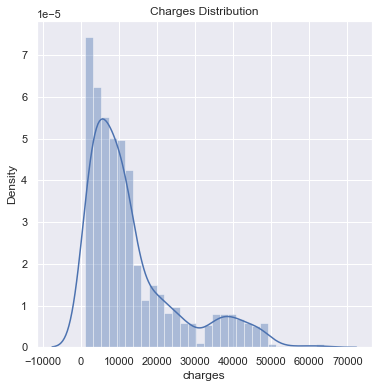

In [23]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

C:\Users\Sai Siva Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

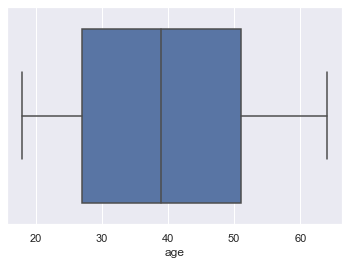

In [24]:
#Visualizing the "Age"
sns.boxplot(data["age"])

C:\Users\Sai Siva Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

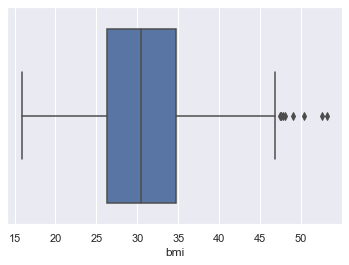

In [25]:
#Visualizing the "Age"
sns.boxplot(data["bmi"])

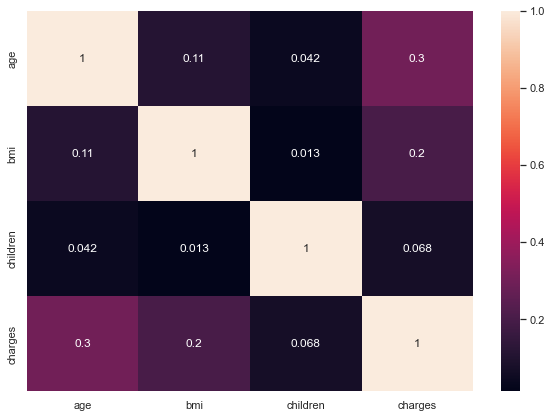

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

First, we define a function to distinguish smokers and non-smokers

In [27]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
data["smoker_norm"]=map_smoking(data["smoker"])

In [28]:
nonnum_cols=[col for col in data.select_dtypes(include=["object"])]

Also, we will create a new feature that distinguishes obese and non-obese individuals

In [29]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
data["obese"]=map_obese(data["bmi"])

In [30]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


We now explore the relation between the features given and the insurance costs

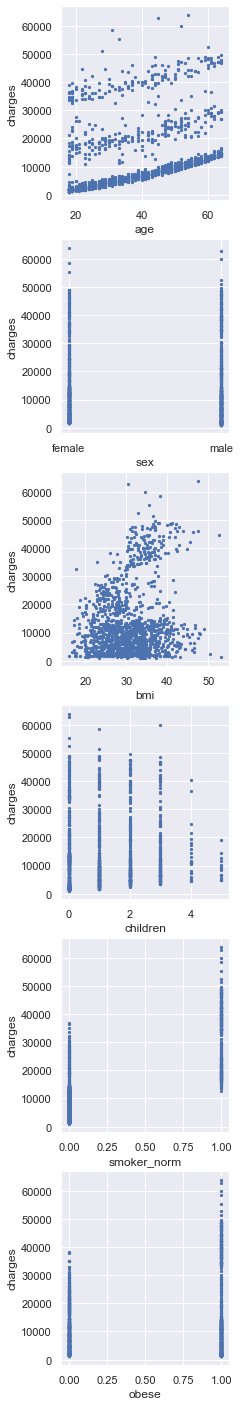

In [31]:
colnum=len(data.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in data.columns if i not in ["smoker","region","charges","sex_norm"]]):
    
    ax[ind].scatter(data[col],data.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

### 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values 

In [32]:
data=pd.read_csv("insurance.csv")

In [33]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})


In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [35]:
X = data.drop(['charges'],axis=1)
y = data['charges']

### 9. Train/Test split
#### 1. Split data into two part : a training set and a testing set
#### 2. Train the model(s) on training set
#### 3. Test the Model(s) on Testing set

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1070, 6)
X_test shape:  (268, 6)
y_train shpae:  (1070,)
y_test shape:  (268,)


### 10. Import the models

In [38]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor

### 11. Model Training

In [39]:
#Fit linear_regression
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

#Fit Random_forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

#Fit Ada_Boost_Regressor..........
Ada_boost = AdaBoostRegressor()
Ada_boost.fit(X_train, y_train)

#Fit Bagging_Regressor..........
Bagging = BaggingRegressor()
Bagging.fit(X_train, y_train)

#Fit Extra_tree_regressor........
Extra_trees = ExtraTreesRegressor()
Extra_trees.fit(X_train, y_train)

#Fit Decision_tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 12. Prediction on Test Data

In [40]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)
y_pred5 = Ada_boost.predict(X_test)
y_pred6 =Bagging.predict(X_test)
y_pred7 = Extra_trees.predict(X_test)
y_pred8 = tree.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4,'Ada_boost':y_pred5,'Bagging':y_pred6,'Extra_trees':y_pred7,'tree':y_pred8})

In [41]:
df1

,Actual,Lr,svm,rf,gr,Ada_boost,Bagging,Extra_trees,tree
764,9095.06825,8924.407244,9548.261584,10441.276259,11001.128629,10189.709770,10977.282074,10863.164944,7518.02535
887,5272.17580,7116.295018,9492.515425,5223.048897,5840.174656,8028.543474,6785.004125,4987.274382,5469.00660
890,29330.98315,36909.013521,9648.758701,28272.852710,28001.980112,26242.301758,28413.464775,28919.067403,28950.46920
1293,9301.89355,9507.874691,9555.044136,9936.770931,9745.291602,10189.709770,9056.565825,9762.572962,9500.57305
259,33750.29180,27013.350008,9420.421978,34525.040356,33639.100981,36321.232943,34237.356130,34383.240037,33732.68670
...,...,...,...,...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47222.389911,45431.423211,46618.558404,47111.797904,46715.682190,46599.10840
575,12222.89830,11814.555568,9625.431547,13074.963119,12465.025294,13579.026610,14231.052977,12662.585176,10965.44600
535,6067.12675,7638.107736,9504.168517,6371.363786,6974.336525,8028.543474,6142.440250,6119.508004,6555.07035
543,63770.42801,40959.081722,9605.004594,46837.376898,47862.047791,46618.558404,48566.069378,46250.004904,47269.85400


### 13. Compare Performance Visually 

In [42]:
import matplotlib.pyplot as plt

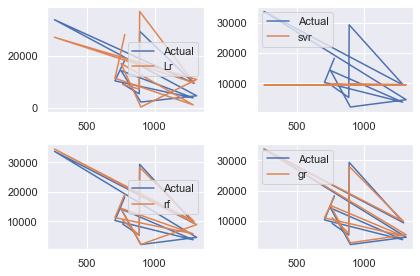

In [43]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.legend()

plt.tight_layout()

plt.legend()

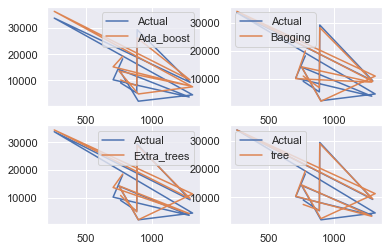

In [44]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Ada_boost'].iloc[0:11],label="Ada_boost")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Bagging'].iloc[0:11],label="Bagging")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Extra_trees'].iloc[0:11],label="Extra_trees")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['tree'].iloc[0:11],label="tree")
plt.legend()


### 14. Evaluating the Algorithm R2 score

In [45]:
from sklearn import metrics

In [46]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)
score7 = metrics.r2_score(y_test,y_pred7)
score8 = metrics.r2_score(y_test,y_pred8)


In [47]:
print(score1,score2,score3,score4,score5,score6,score7,score8)

0.7833463107364538 -0.07229762787861826 0.8673373476925531 0.8779726251291786 0.8382379809444453 0.8644763902510344 0.8484116470230364 0.6935050092734778


### 14. Evaluating the Algorithm MAE

In [48]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)
s5 = metrics.mean_absolute_error(y_test,y_pred5)
s6 = metrics.mean_absolute_error(y_test,y_pred6)
s7 = metrics.mean_absolute_error(y_test,y_pred7)
s8 = metrics.mean_absolute_error(y_test,y_pred8)



In [49]:
print(s1,s2,s3,s4,s5,s6,s7,s8)



4186.508898366437 8592.428727899724 2461.0952117185952 2447.951558054584 3904.2594435227584 2444.919370516791 2459.3290938945897 3105.7863802574625


### 14. Evaluating the Algorithm MSE





In [50]:
ss1=metrics.mean_squared_error(y_test,y_pred1)
ss2=metrics.mean_squared_error(y_test,y_pred2)
ss3=metrics.mean_squared_error(y_test,y_pred3)
ss4=metrics.mean_squared_error(y_test,y_pred4)
ss5=metrics.mean_squared_error(y_test,y_pred5)
ss6=metrics.mean_squared_error(y_test,y_pred6)
ss7=metrics.mean_squared_error(y_test,y_pred7)
ss8=metrics.mean_squared_error(y_test,y_pred8)

In [51]:
print(ss1,ss2,ss3,ss4,ss5,ss6,ss7,ss8)

33635210.43117842 166472846.50979328 20595708.487065334 18944595.15596614 25113348.26192295 21039868.500713058 23533899.508600805 47582958.51887545


### 15. Predict Charges For New Customer

In [52]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [53]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [54]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43931.136130489554


In [56]:
import joblib
joblib.dump (gr, 'model_joblib_gr')

['model_joblib_gr']

In [58]:
model=joblib.load('model_joblib_gr')
model.predict (df)

array([43931.13613049])

In [8]:
import streamlit

In [13]:
import streamlit as st
import joblib


def main():
    
    #st.markdown(html_temp,unsafe_allow_html=True)
    
    # load the model
    model = joblib.load('model_joblib_gr')
    
    p1 = st.slider("Enter Your Age",18,100)
    
    s1=st.selectbox("Sex",("Male","Female"))
    if s1=="Male":
        p2=1
    else:
        p2=0

    p3 =st.number_input("Enter Your BMI Value")
    p4 = st.slider("Enter Number of Children",0,4) 
    
    s2=st.selectbox("Smoker",("Yes","No"))
    if s2=="Yes":
        p5=1
    else:
        p5=0
        
    p6 = st.slider("Enter Your Region [1-4]",1,4)
    
    if st.button('Predict'):
        prediction = model.predict([[p1,p2,p3,p4,p5p6]])
        st.balloons()
        st.success('Insurance Amount is {} '.format(round(prediction[0],2)))    
    
if __name__ == '__main__':
    main()

NameError: name 'html_temp' is not defined

In [9]:
!streamlit run web.py

SyntaxError: invalid syntax (Temp/ipykernel_5416/4202141939.py, line 2)